<a href="https://colab.research.google.com/github/yexf308/MAT592/blob/main/Homework/HW3/Sp22HW3Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline 
import numpy.linalg as LA
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Q4: Finding The Optimal Parking Lots Locations (40pt)
As part of the effort of NYC to make its data publicly available and accessible, the city releases every month the full list of all taxi rides around the city. We will be using the dataset from January 2016, which can be found [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

The full dataset includes over 10M taxi rides. In our course, we will be using a smaller subset of this dataset with only 100k rides (which has also been cleaned up a bit). We will start by loading the data and printing the 10 first rows.

In [2]:
!wget https://github.com/yexf308/MAT592/raw/main/homework/HW3/nyc_taxi_rides.csv?raw=true -O nyc_taxi_rides.csv

--2022-01-21 22:33:33--  https://github.com/yexf308/MAT592/raw/main/homework/HW3/nyc_taxi_rides.csv?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW3/nyc_taxi_rides.csv [following]
--2022-01-21 22:33:33--  https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW3/nyc_taxi_rides.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13394600 (13M) [text/plain]
Saving to: ‘nyc_taxi_rides.csv’

nyc_taxi_rides.csv  100%[===================>]  12.77M  --.-KB/s    in 0.05s   

2022-01-21 22:33:34 (242 MB/s) - ‘nyc_taxi_rides.csv’ saved [13394600/13394600]


In [3]:
dataset = pd.read_csv('nyc_taxi_rides.csv')

## Print the number of rows in the data set
number_of_rows = len(dataset)
print('Number of rows in the dataset: N={}'.format(number_of_rows))

## Show the first 5 rows and last 5 rows
dataset

Number of rows in the dataset: N=100000


,passenger_count,trip_distance,payment_type,fare_amount,tip_amount,pickup_easting,pickup_northing,dropoff_easting,dropoff_northing,duration,day_of_week,day_of_month,time_of_day
0,2,2.768065,2,9.5,0.00,586.996941,4512.979705,588.155118,4515.180889,11.516667,3,13,12.801944
1,1,3.218680,2,10.0,0.00,587.151523,4512.923924,584.850489,4512.632082,12.666667,6,16,20.961389
2,1,2.574944,1,7.0,2.49,587.005357,4513.359700,585.434188,4513.174964,5.516667,0,31,20.412778
3,1,0.965604,1,7.5,1.65,586.648975,4511.729212,586.671530,4512.554065,9.883333,1,25,13.031389
4,1,2.462290,1,7.5,1.66,586.967178,4511.894301,585.262474,4511.755477,8.683333,2,5,7.703333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,3.218680,2,8.0,0.00,586.185469,4513.033744,585.468560,4510.530082,6.400000,4,28,6.925000
99996,5,1.142631,1,4.0,1.32,585.765009,4512.580782,585.200602,4511.590442,1.666667,1,25,5.041667
99997,1,5.471756,2,12.5,0.00,587.498875,4512.905997,591.728405,4512.904235,11.666667,6,9,15.407500
99998,1,3.894603,1,11.5,2.00,589.082301,4511.109238,591.331933,4513.822199,14.383333,5,1,21.158889


In this exercise we will only be interested in the following columns:

- **dropoff_easting** - The horizontal coordinate (east-west) (in UTM-WGS84 (~ in kilometers))
- **dropoff_northing** - The vertical coordinate (north-south) (in UTM-WGS84 (~ in kilometers))

(A full description for each of the other columns can be found [here](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf))

Define the $2\times N$ array $X$ of drop off locations.

In [4]:
X = dataset[['dropoff_easting','dropoff_northing']].values
print('The first 10 rows in X are:\n{}'.format(X[:10, :]))

The first 10 rows in X are:
[[ 588.15511774 4515.18088924]
 [ 584.85048892 4512.63208213]
 [ 585.43418784 4513.17496388]
 [ 586.67153039 4512.55406531]
 [ 585.26247362 4511.75547748]
 [ 585.16897267 4511.54010337]
 [ 588.71017492 4514.20918449]
 [ 585.84396658 4509.54508925]
 [ 583.67108081 4507.73557339]
 [ 587.7012478  4513.70969066]]


The following code plots the map of drop off points. The figure you got resembles the shape of the 
streets in NYC: [map](https://www.google.com/maps/@40.7328589,-73.9545177,13z)

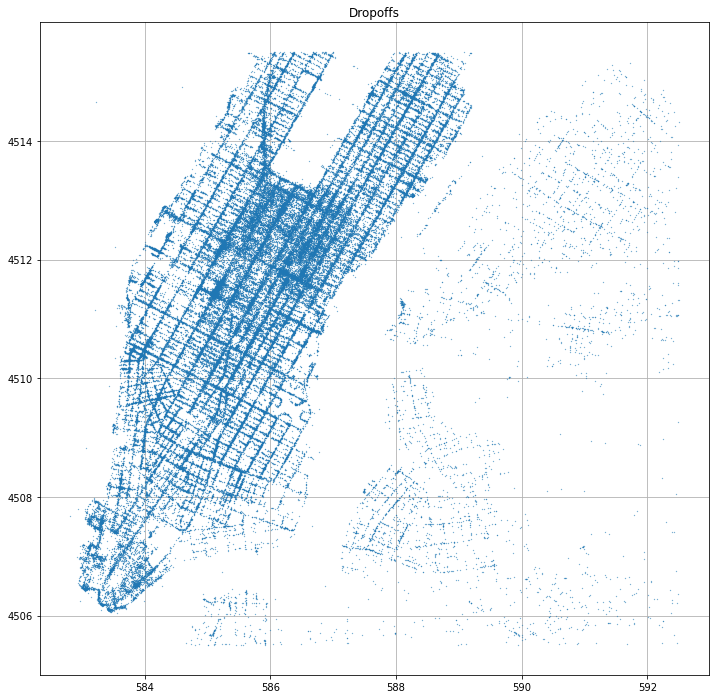

In [5]:
## Plot the map
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(X[:, 0], X[:, 1], '.', markersize=0.5);
ax.set_title('Dropoffs');

<br>


---
## Finding The Optimal Parking Lots Locations

A NY taxi company is looking to rent $K$ parking lots so that their taxis can wait in them in between rides.

It would like to select the optimal locations to place these parking lots such that the average distance from the drop off location to the nearest parking lot will be minimal.

### Q4.1:  $L_1$ distance (5pt)
In class, we have searched for the best $K$ locations which will minimize the $L_2$ (Euclidean) distances, but actually, in the case of NYC, it makes more sense to minimize the $L_1$ distance.

Write one function which calculates the $L_1$ distance between two vectors. 



In [ ]:
def calc_l1_dist(x, y):
  # your code starts here
    

In [ ]:
## Testing the functions
v1 = np.array([0, 0])
v2 = np.array([3, 0])
v3 = np.array([0, 4])
v4 = np.array([3, 4])
print('L1 norm beteen v1 and v2: {:.2f}'.format(calc_l1_dist(v1, v2)))
print('L1 norm beteen v2 and v3: {:.2f}'.format(calc_l1_dist(v2, v3)))
print('L1 norm beteen v1 and v4: {:.2f}'.format(calc_l1_dist(v1, v4)))


A much more efficient way to calculate all the distances between two lists of vectors would be to use the [cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) function from the scipy package. The third parameter of this function define the type of distance which is to be used: *euclidean* for $L_2$ and *cityblock* for $L_1$.


In [ ]:
from scipy.spatial.distance import cdist

all_l2_distances = cdist(v, v, 'euclidean')
all_l1_distances = cdist(v, v, 'cityblock')


### Q4.2: Rotating the map (10pt)

In order for the L1 distance to actually be the ride distance, we need to rotate the map such that the streets of NYC will be parallel to the axis.

Rotate the array of drop off points $x$ such that:
- The streets of NYC (going from South-East to North-West) will be parallel to the x axis
- The Avenues of NYC (going from South-west to North-East) will be parallel to the y axis.

Do so by constructing a rotation matrix, and multiply $x$ by that matrix to get the rotated drop off points.

Use the following:

- A normalized vector pointing in a direction parallel to the avenues of NYC: 

$$
\boldsymbol{e}_1=\left(0.88, -0.47\right)^T
$$

- A normalized vector pointing in a direction parallel to the streets of NYC: 
$$
\boldsymbol{e}_2=\left(0.47, 0.88\right)^T
$$

Make sure that that the streets are now more or less aligned to $x$ and $y$ axis.

In [ ]:
# your code starts here
rot_mat = 
x_rot_train = 

## Plot the map
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(x_rot_train[:, 0], x_rot_train[:, 1], '.', markersize=0.5);
ax.set_title('Rotated Dropoffs');

### Q4.3: The K-Medians algorithm (25pt)

Similar to the K-Means algorithm, which tries to minimize the sum of squared $L_2$ distances between each point and one of the $K$ centers, there is also a K-Medians algorithm which tries to minimize the sum of $L_1$ distances.

As we saw for the case of the $L_2$, the center point which minimizes the sum of squared $L_2$ distances from a given set of points, is the **mean** point of the given points.

Equivalently, the center point which minimizes the sum of $L_1$ distances from a given set of points is the point which is **median** (in each one of the axis) of the given points.

### The Algorithm

The K-Medians algorithm differs from the K-means algorithm in the following way:

1. The assignment of each point the nearest center will now be based upon the $L_1$ distance instead of the $L_2$ distance.
2. The center will be now calculated using the Median value insted of Mean value.

Modify K-means code so that it will implement the K-Medians algorithm with $K=5$.

In [ ]:
# Your code starts here 
def my_kmedians(X, K, max_iter=100):


In [ ]:
# test with dataset matrix X